## EDA: psychopathy data covariates

### Imports

In [29]:
import os
import nilearn as nil
from nilearn import plotting
import nibabel as nib
import pandas as pd
import numpy as np
import crazyscripts
import matplotlib.pyplot as plt
import re
import seaborn as sns; sns.set()
from pandas.api.types import is_numeric_dtype
import warnings; warnings.filterwarnings('ignore')

## Look at some of the data

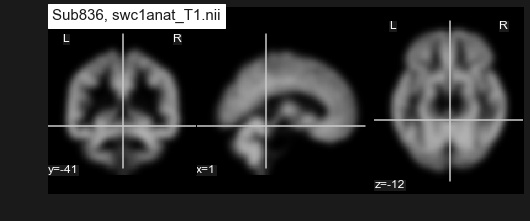

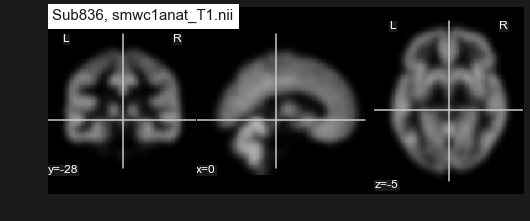

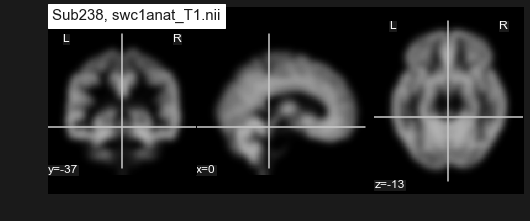

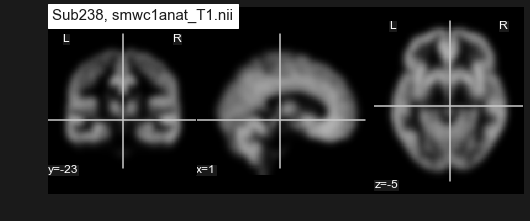

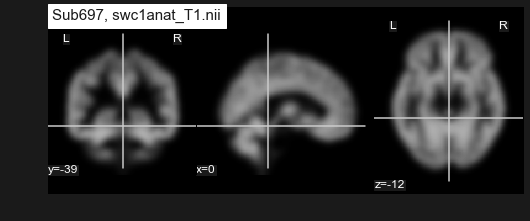

In [48]:
# look at the data
idx = 0
rgx = re.compile(r'Sub[0-9]*')
for i, j, fl in os.walk("data/JHU_VBM"):
    for eachfile in fl:
        idx += 1
        if idx > 5:
            break
        if eachfile.endswith(".nii"):
            plotting.plot_anat(os.path.join(i, eachfile), title=(', '.join([re.search(rgx, i).group(), eachfile])))
            plt.show()

## Explore as DataFrame

In [28]:
df = pd.read_excel("data/VH_n216_vs_NV_n135_vs_VNH_n538_covariates.xlsx")

In [4]:
df.head()

,SubNum,Group,Group_Lab,Age,IQ,PCLR_Total,log10subuse,GM+WM
0,Sub001,1,NV,21,103.0,35.3,0.78,1201.268251
1,Sub002,1,NV,34,134.0,10.0,0.00,1301.977338
2,Sub003,1,NV,33,106.0,21.0,1.36,1164.731682
3,Sub004,1,NV,46,103.0,10.0,0.00,1199.627199
4,Sub005,1,NV,35,103.0,18.0,0.78,1316.691431


In [5]:
df.describe()

,Group,Age,IQ,PCLR_Total,log10subuse,GM+WM
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,2.091421,33.658228,97.982461,21.956471,0.690267,1194.614809
std,0.622419,8.978844,13.557867,7.114721,0.429700,105.562118
min,1.000000,18.000000,72.000000,3.200000,0.000000,884.713932
25%,2.000000,26.500000,89.000000,16.800000,0.300000,1128.191364
50%,2.000000,32.000000,97.000000,22.100000,0.780000,1190.225811
75%,2.000000,40.000000,109.000000,27.000000,1.000000,1259.296274
max,3.000000,65.000000,137.000000,40.000000,1.700000,1551.914702


### Explore Group

- one-to-one mapping between 'Group' and 'Group_Lab'. {‘NV’: 1, ‘VNH’: 2, ’H’: 3}

In [6]:
df.groupby('Group').mean()

,Age,IQ,PCLR_Total,log10subuse,GM+WM
Group,,,,,
1,32.731481,99.282685,20.827778,0.768704,1222.902098
2,34.211628,98.283721,21.714819,0.669023,1188.075279
3,32.861272,96.421965,23.261725,0.694104,1193.210016


In [8]:
df['Group_Lab'].unique()

array(['NV', 'VNH', 'H'], dtype=object)

- no immediate apparent difference between groups on any of the variables.

In [9]:
df.groupby('Group_Lab').mean()

,Group,Age,IQ,PCLR_Total,log10subuse,GM+WM
Group_Lab,,,,,,
H,3.0,32.861272,96.421965,23.261725,0.694104,1193.210016
NV,1.0,32.731481,99.282685,20.827778,0.768704,1222.902098
VNH,2.0,34.211628,98.283721,21.714819,0.669023,1188.075279


## Histograms of each variable

- GM+WM is extremely normally distributed, log10subuse doesn't have many unique values

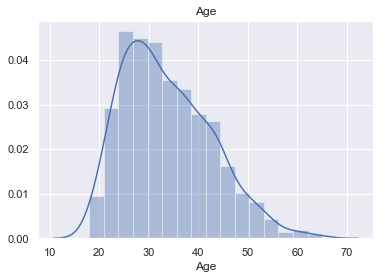

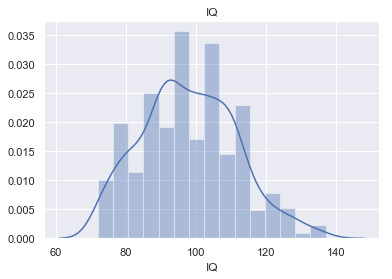

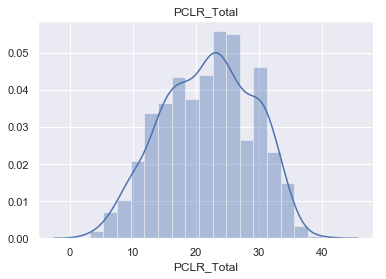

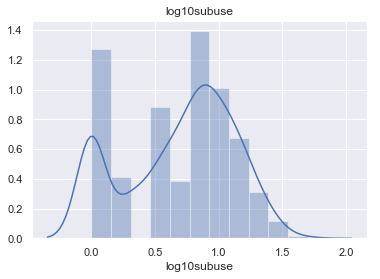

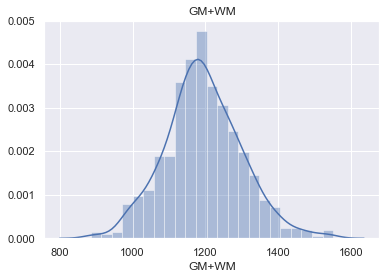

In [68]:
for idx, var in enumerate(df[['Age', 'IQ', 'PCLR_Total', 'log10subuse', 'GM+WM']]):
    # plot and title
    sns.distplot(df[var])
    plt.title(var)
    plt.show()

In [69]:
len(df['log10subuse'].unique())

32

In [71]:
len(df)

711

In [72]:
df['Group_Lab'].unique()

array(['NV', 'VNH', 'H'], dtype=object)